<a href="https://colab.research.google.com/github/vinayakgautam368/Memes-vs-Notes/blob/master/MEMES_VS_NOTES_BATCHES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import sklearn
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
directory="drive/My Drive/memesnotes/Stage_2"
CATEGORIES=["Memes","Notes"]
data=[]
size=64
for category in CATEGORIES:
  path=os.path.join(directory,category)
  
  label=CATEGORIES.index(category)
  for img in os.listdir(path):
    
    try:
      img_arr=cv2.imread(os.path.join(path,img))
      img_arr=cv2.resize(img_arr,(size,size))
      data.append([img_arr,label])
    except Exception as e:
      pass




    

In [3]:
random.shuffle(data)
X = []
Y = []
for features, labels in data:
    X.append(features)
    Y.append(labels)
X = np.array(X)
Y = np.array(Y)



In [4]:
# print(X.shape, Y.shape)

X_tra, X_te, Y_tra, Y_te = train_test_split(X, Y, test_size=0.3)

# print(X_tra.shape, Y_tra.shape, X_te.shape, Y_te.shape)

X_train = X_tra.reshape(X_tra.shape[0], -1).T
X_test = X_te.reshape(X_te.shape[0], -1).T
Y_train = Y_tra.reshape((1, Y_tra.shape[0]))
Y_test = Y_te.reshape((1, Y_te.shape[0]))

X_train = X_train / 255
X_test = X_test / 255

print("shape of X_train:", X_train.shape)
print("shape of Y_train:", Y_train.shape)
print("shape of X_test:", X_train.shape)
print("shape of Y_test", Y_test.shape)



shape of X_train: (12288, 1120)
shape of Y_train: (1, 1120)
shape of X_test: (12288, 1120)
shape of Y_test (1, 480)


In [5]:

def initialize(layer):
    np.random.seed(3)
    parameters = {}
    L = len(layer)

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer[l], layer[l - 1]) / np.sqrt(layer[l - 1])
        parameters['b' + str(l)] = np.zeros((layer[l], 1))

        assert (parameters['W' + str(l)].shape == (layer[l], layer[l - 1]))
        assert (parameters['b' + str(l)].shape == (layer[l], 1))

    return parameters


In [6]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    return A, cache



def relu(Z):
    A = np.maximum(0, Z)
    cache = Z
    return A, cache


def sigmoid_backward(dA, cache):
    Z = cache
    s = 1 / (1 + np.exp(-Z))
    dZ = dA * s * (1 - s)
    return dZ


def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ



In [7]:

def linear_forward(A, W, b):
    Z = np.dot(W, A) + b
    assert (Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)

    return Z, cache


In [8]:

def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":

        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

    elif activation == "relu":

        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    else:
        pass

    cache = (linear_cache, activation_cache)

    return A, cache


In [9]:

def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2

    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters["W" + str(l)], parameters["b" + str(l)],
                                             activation="relu")
        caches.append(cache)

    AL, cache = linear_activation_forward(A, parameters["W" + str(L)], parameters["b" + str(L)], activation="sigmoid")
    caches.append(cache)

    assert (AL.shape == (1, X.shape[1]))

    return AL, caches



In [10]:
def compute_cost(AL, Y):
    m = Y.shape[1]

    cost = (-1 / m) * np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL))

    cost = np.squeeze(cost)
    assert (cost.shape == ())

    return cost


In [11]:

def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = np.dot(W.T, dZ)

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)

    return dA_prev, dW, db


In [12]:

def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache

    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    return dA_prev, dW, db



In [13]:

def backward(AL, Y, caches):
    grads = {}
    L = len(caches)

    m = AL.shape[1]
    Y = Y.reshape(AL.shape)

    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    current_cache = caches[L - 1]
    grads["dA" + str(L - 1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,
                                                                                                      current_cache,
                                                                                                      activation="sigmoid")

    for l in reversed(range(L - 1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache,
                                                                    activation="relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads


In [14]:

def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2

    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
    return parameters


In [15]:

def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2
    new = np.zeros((1, m))

    Y_pred, caches = L_model_forward(X, parameters)

    for i in range(0, Y_pred.shape[1]):
        if Y_pred[0, i] > 0.5:
            new[0, i] = 1
        else:
            new[0, i] = 0

    return new

In [21]:


layers = [12288,500,100,20,5,1]


def model(mini, layers_dims, learning_rate=0.0070, num_iterations=3000,
          print_cost=False):
    costs = []
    parameters = initialize(layers_dims)

    for epochs in range(0, num_iterations):
      for batch in mini:
        AL, caches = L_model_forward(batch[0], parameters)

        cost = compute_cost(AL, batch[1])

        grads = backward(AL, batch[1], caches)

        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and epochs % 100 == 0:
            costs.append(cost)        

      if print_cost and epochs % 100 == 0:
            print("Training cost after epoch %i: %f" % (epochs, cost))



    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations ')
    plt.title("Training set")
    plt.show()

    return parameters


In [22]:
import math
def random_minibatch(X,Y,mini_batch_size=128):
  m=X.shape[1]
  mini_batches=[]
  permutation=list(np.random.permutation(m))
  shuffled_X=X[:,permutation]
  shuffled_Y=Y[:,permutation]
  num=math.floor(m/mini_batch_size)
  for k in range(num):
    mini_batch_X=shuffled_X[:,k*mini_batch_size:(k+1)*mini_batch_size]
    mini_batch_Y=shuffled_Y[:,k*mini_batch_size:(k+1)*mini_batch_size]

    mini_batch=(mini_batch_X,mini_batch_Y)
    mini_batches.append(mini_batch)
    if m % mini_batch_size!=0:
      mini_batch_X=shuffled_X[:,num*mini_batch_size:]
      mini_batch_Y=shuffled_Y[:,num*mini_batch_size:]
      mini_batch=(mini_batch_X,mini_batch_Y)
      mini_batches.append(mini_batch)
  return mini_batches
mini=random_minibatch(X_train,Y_train)

Training cost after epoch 0: 0.685958
Training cost after epoch 100: 0.281271
Training cost after epoch 200: 0.128935
Training cost after epoch 300: 0.067890
Training cost after epoch 400: 0.039048
Training cost after epoch 500: 0.024940
Training cost after epoch 600: 0.017383
Training cost after epoch 700: 0.012761
Training cost after epoch 800: 0.009682
Training cost after epoch 900: 0.007516
Training cost after epoch 1000: 0.005926
Training cost after epoch 1100: 0.004749
Training cost after epoch 1200: 0.003828
Training cost after epoch 1300: 0.003091
Training cost after epoch 1400: 0.002532
Training cost after epoch 1500: 0.002108
Training cost after epoch 1600: 0.001777
Training cost after epoch 1700: 0.001526
Training cost after epoch 1800: 0.001331
Training cost after epoch 1900: 0.001180
Training cost after epoch 2000: 0.001054
Training cost after epoch 2100: 0.000957
Training cost after epoch 2200: 0.000873
Training cost after epoch 2300: 0.000800
Training cost after epoch 24

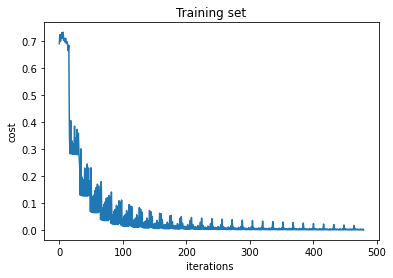

Train Accuracy : 99.91071428571429 %
Test Accuracy : 95.41666666666667 %


In [23]:

parameters = model(mini, layers, learning_rate=0.0005, num_iterations=3000, print_cost=True)

test_pred = predict(X_test, Y_test, parameters)

train_pred = predict(X_train, Y_train, parameters)

print("Train Accuracy : {} %".format(100 - np.mean(np.abs(train_pred - Y_train)) * 100))

print("Test Accuracy : {} %".format(100 - np.mean(np.abs(test_pred - Y_test)) * 100))


In [24]:
# import math
# def random_minibatch(X,Y,mini_batch_size=64):
#   m=X.shape[1]
#   mini_batches=[]
#   permutation=list(np.random.permutation(m))
#   shuffled_X=X[:,permutation]
#   shuffled_Y=Y[:,permutation]
#   num=math.floor(m/mini_batch_size)
#   for k in range(num):
#     mini_batch_X=shuffled_X[:,k*mini_batch_size:(k+1)*mini_batch_size]
#     mini_batch_Y=shuffled_Y[:,k*mini_batch_size:(k+1)*mini_batch_size]

#     mini_batch=(mini_batch_X,mini_batch_Y)
#     mini_batches.append(mini_batch)
#     if m % mini_batch_size!=0:
#       mini_batch_X=shuffled_X[:,num*mini_batch_size:]
#       mini_batch_Y=shuffled_Y[:,num*mini_batch_size:]
#       mini_batch=(mini_batch_X,mini_batch_Y)
#       mini_batches.append(mini_batch)
#   return mini_batches


# a=random_minibatch(X_train,Y_train)
# print(a[0][0].shape)
# print(a[0][1].shape)



In [25]:
# m=X_train.shape[1]
# m
# # b=list(np.random.permutation(m))
# # b

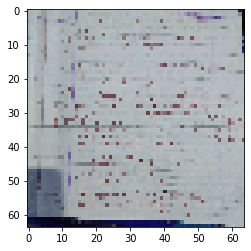

(64, 64, 3)
(12288, 1)


In [30]:
x="drive/My Drive/IMG_20200811_154426.jpg"
img=cv2.imread(x)
img=cv2.resize(img,(64,64))
plt.imshow(img)
plt.show()

c=np.array(img)
print(c.shape)
c=c.reshape(64*64*3,1)
print(c.shape)

In [27]:
al,caches=L_model_forward(c, parameters)

if al>0.5:
  print("IT IS A NOTE")
else:
  print("IT IS A MEME")

IT IS A NOTE


In [70]:
test_notes=data[10:20]
test_memes=data[1500:1510]
for i in test_memes:
  test_notes.append(i)

random_set=test_notes
random.shuffle(random_set)

TESTING OF THE MODEL

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


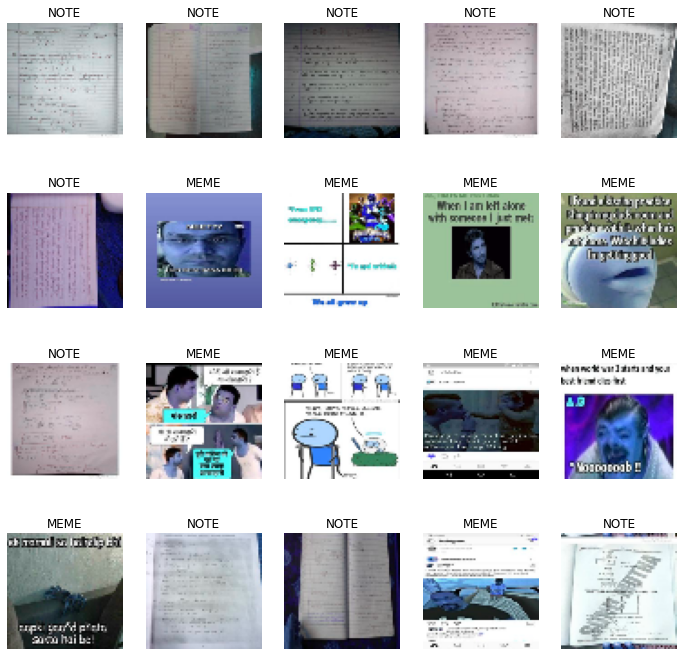

In [69]:
fig = plt.figure(figsize=(12,12))
rows = 4
columns = 5
for i in range(20):
  c=np.array(random_set[i][0])
  c=c.reshape(64*64*3,1)
  al,caches=L_model_forward(c, parameters)
  if al>0.5:
    ans="NOTE"
  else:
    ans="MEME"
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(random_set[i][0])
  plt.axis('off')
  plt.title(ans)
